In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2]:
np.random.seed(42)
mean = [6,6]
cov = [[3, 2.8], [2.8, 3]]
data = np.random.multivariate_normal(mean, cov, 200)
print(data[:10])

[[5.19784929 5.11040327]
 [4.41540183 5.37865049]
 [6.47278944 6.32470822]
 [3.06801331 3.55338165]
 [6.62791352 6.97105862]
 [6.93644857 6.64189521]
 [6.19298544 4.98292076]
 [9.11524015 8.75961829]
 [7.62541552 7.82416298]
 [7.99291893 7.09969964]]


In [3]:
df = pd.DataFrame(data, columns=['Intensidad', 'Frutalidad'])
df.head(10)

,Intensidad,Frutalidad
0,5.197849,5.110403
1,4.415402,5.378650
2,6.472789,6.324708
3,3.068013,3.553382
4,6.627914,6.971059
5,6.936449,6.641895
6,6.192985,4.982921
7,9.115240,8.759618
8,7.625416,7.824163
9,7.992919,7.099700


In [6]:
pca = PCA()

data_pca = pca.fit_transform(df)
data_pca[:10]

array([[-1.18138736,  0.0727039 ],
       [-1.54091216, -0.67222731],
       [ 0.57851385,  0.12520754],
       [-3.78613463, -0.34659222],
       [ 1.14713354, -0.21903651],
       [ 1.13008061,  0.23179786],
       [-0.5722152 ,  0.86985948],
       [ 4.16789358,  0.29159866],
       [ 2.45513172, -0.10977509],
       [ 2.19850283,  0.66096968]])

### Varianza acumulada

In [17]:
print(f"Varianza explicada por PC1: {pca.explained_variance_ratio_[0]:.2%}")
print(f"Varianza explicada por PC2: {pca.explained_variance_ratio_[1]:.2%}")

Varianza explicada por PC1: 96.62%
Varianza explicada por PC2: 3.38%


### Pesos (loadings) de cada componente

In [13]:
# pca.components_[num_componente,num_característica] -> Peso de esa característica en el componente
print("INTENSIDAD | FRUTALIDAD")
print(f"PC1: {pca.components_[0,0]:.3f} | {pca.components_[0,1]:.3f}")
print(f"PC2: {pca.components_[1,0]:.3f} | {pca.components_[1,1]:.3f}")

INTENSIDAD | FRUTALIDAD
PC1: 0.703 | 0.711
PC2: 0.711 | -0.703


### Transformed scores (valores calculados)

In [14]:
df_pca = pd.DataFrame(data_pca, columns=['Calidad', 'Balance'])
df_pca.head(10)

,Calidad,Balance
0,-1.181387,0.072704
1,-1.540912,-0.672227
2,0.578514,0.125208
3,-3.786135,-0.346592
4,1.147134,-0.219037
5,1.130081,0.231798
6,-0.572215,0.869859
7,4.167894,0.291599
8,2.455132,-0.109775
9,2.198503,0.660970


### Representamos datos originales y componentes principales calculados

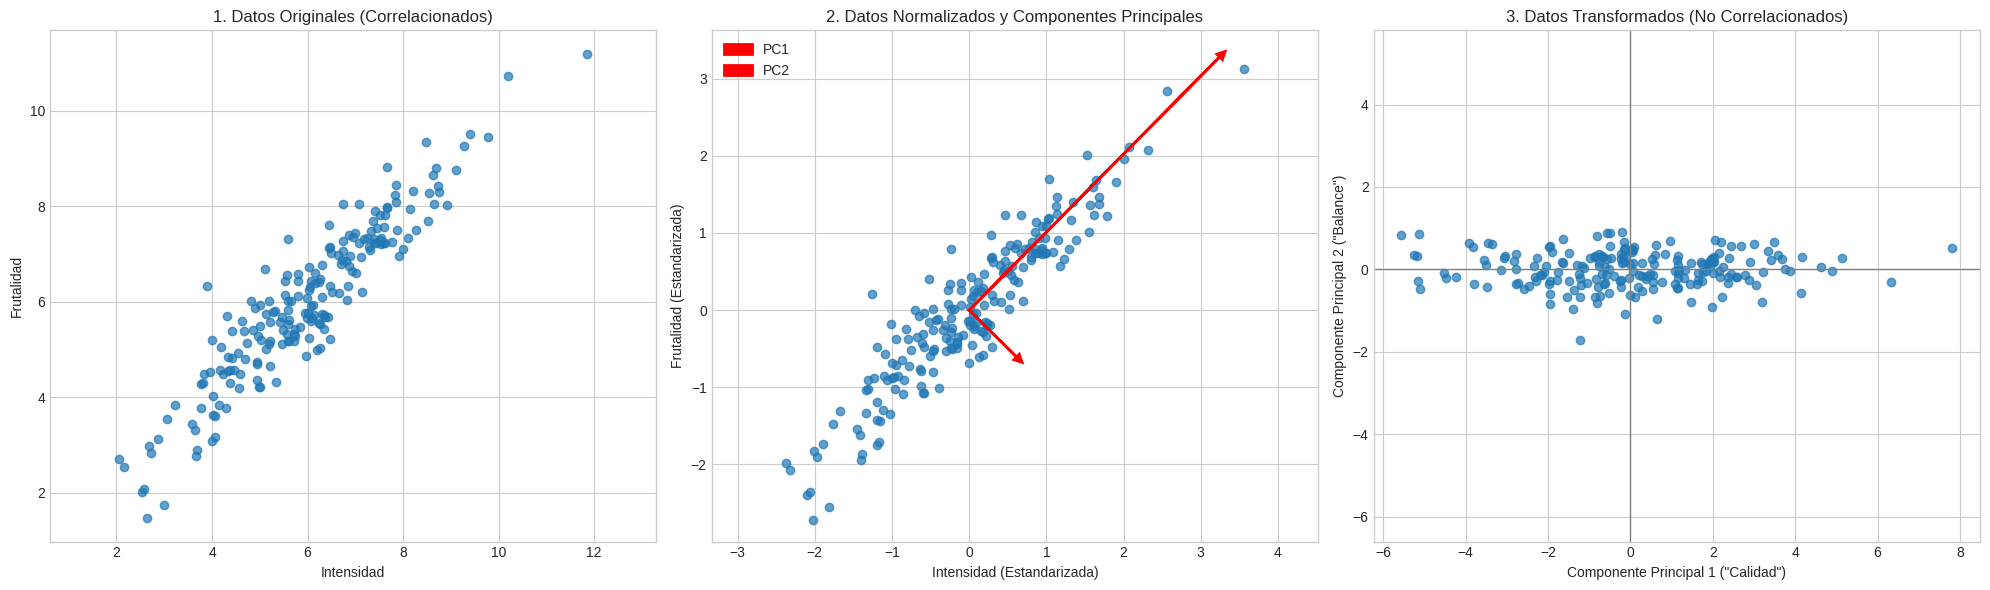

In [21]:
data_norm = StandardScaler().fit_transform(df)

plt.style.use('seaborn-v0_8-whitegrid')
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

# Gráfico 1: Datos Originales (Correlacionados)
axes[0].scatter(df['Intensidad'], df['Frutalidad'], alpha=0.7)
axes[0].set_title('1. Datos Originales (Correlacionados)')
axes[0].set_xlabel('Intensidad')
axes[0].set_ylabel('Frutalidad')
axes[0].axis('equal')

# Gráfico 2: Componentes Principales (Vectores)
axes[1].scatter(data_norm[:, 0], data_norm[:, 1], alpha=0.7)
# Dibujamos los vectores de los "loadings" para ver las direcciones de los PCs
for i, (comp, var) in enumerate(zip(pca.components_, pca.explained_variance_)):
    # Los vectores se escalan por la raíz de la varianza para mostrar su magnitud
    comp = comp * np.sqrt(var) * 2 # El *2 es para que se vean mejor
    axes[1].arrow(0, 0, comp[0], comp[1], head_width=0.1, head_length=0.1,
                  linewidth=2, color='red', label=f'PC{i+1}')
axes[1].set_title('2. Datos Normalizados y Componentes Principales')
axes[1].set_xlabel('Intensidad (Estandarizada)')
axes[1].set_ylabel('Frutalidad (Estandarizada)')
axes[1].legend()
axes[1].axis('equal')


# Gráfico 3: Datos Transformados (Transformed Scores)
axes[2].scatter(data_pca[:, 0], data_pca[:, 1], alpha=0.7)
axes[2].set_title('3. Datos Transformados (No Correlacionados)')
axes[2].set_xlabel('Componente Principal 1 ("Calidad")')
axes[2].set_ylabel('Componente Principal 2 ("Balance")')
axes[2].axhline(0, color='grey', lw=1)
axes[2].axvline(0, color='grey', lw=1)
axes[2].axis('equal')

plt.tight_layout()
plt.show()

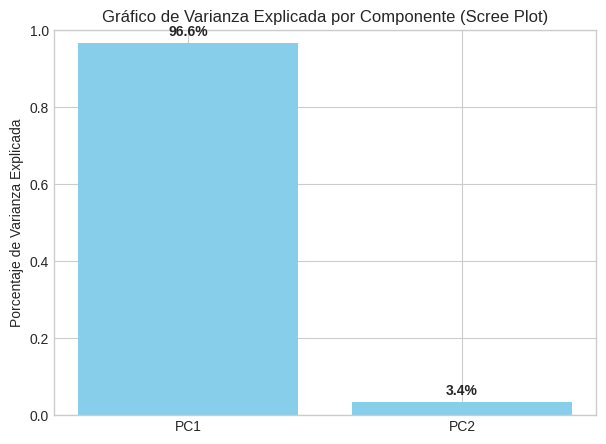

In [22]:
plt.figure(figsize=(7, 5))
plt.bar(['PC1', 'PC2'], pca.explained_variance_ratio_, color='skyblue')
plt.title('Gráfico de Varianza Explicada por Componente (Screen Plot)')
plt.ylabel('Porcentaje de Varianza Explicada')
plt.ylim(0, 1)
for i, v in enumerate(pca.explained_variance_ratio_):
    plt.text(i, v + 0.02, f"{v:.1%}", ha='center', fontweight='bold')
plt.show()